In [1]:
%%shell
pip install qiskit qiskit-aer pylatexenc --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 6.2 MB/s eta 0:00:00


#Implementação usando qiskit do algoritmo proposto por Shukla e Vedula realizada pela Liga Acadêmica de Computação e Informação quântica
Autor: Rodrigo Pontes de Oliveira Lima

###Importação das bibliotecas necessárias

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import UnitaryGate
from math import sqrt,acos,log2, ceil,floor
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit import transpile

###Etapa de tratamento de entradas

In [3]:
m = 14

mString = str(bin(m))

mString = mString.removeprefix('0b')

mString = mString[::-1]
print(mString)
listOfIndex = [pos for pos, char in enumerate(mString) if char == '1']
listOfIndexAux = [x for x in listOfIndex[1:]]

print(listOfIndex)

0111
[1, 2, 3]


###Criação do circuito baseado no pseudocódigo proposto no artigo em referências.

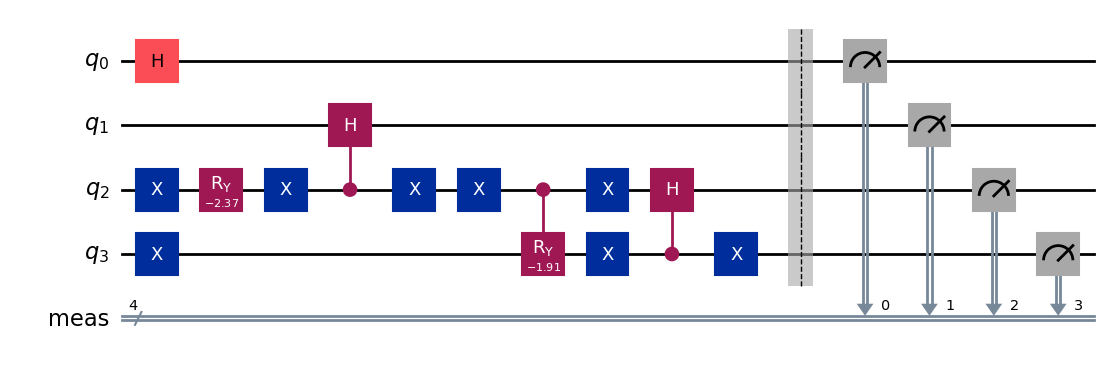

In [4]:
circSize = ceil(log2(m))
circ = QuantumCircuit(circSize)
if(circSize == floor(log2(m))):
  for index in range(circSize):
    circ.h(index)
else:

  size = len(listOfIndex)-1

  for pos1 in listOfIndexAux:
    if(pos1 == 0):
      continue
    circ.x(pos1)

  if(listOfIndex[0] > 0):
    for index in range(listOfIndex[0]):
      circ.h(index)
  m0 = pow(2,listOfIndex[0])

  theta0 = -2 * acos(sqrt(m0/m))

  circ.ry(theta0,listOfIndex[1])

  circ.x(listOfIndex[1])
  for index in range(listOfIndex[0],listOfIndex[1]):
    circ.ch(listOfIndex[1],index)
  circ.x(listOfIndex[1])

  mIndex = m0

  for index in range(1,size):
    thetaIndex = -2 * acos(sqrt(pow(2,listOfIndex[index])/(m - mIndex)))

    circ.x(listOfIndex[index])
    circ.cry(thetaIndex,listOfIndex[index],listOfIndex[index+1])
    circ.x(listOfIndex[index])

    circ.x(listOfIndex[index+1])
    for index2 in range(listOfIndex[index],listOfIndex[index+1]):
      circ.ch(listOfIndex[index+1],index2)
    circ.x(listOfIndex[index+1])

    mIndex = mIndex + pow(2,listOfIndex[index])

circ.measure_all()

circ.draw('mpl')

###Etapa de transpilação do circuito
Podemos perceber que a decomposição em portas unitárias e CNOTs segue a mesma eficiência que a profundidade do algoritmo  

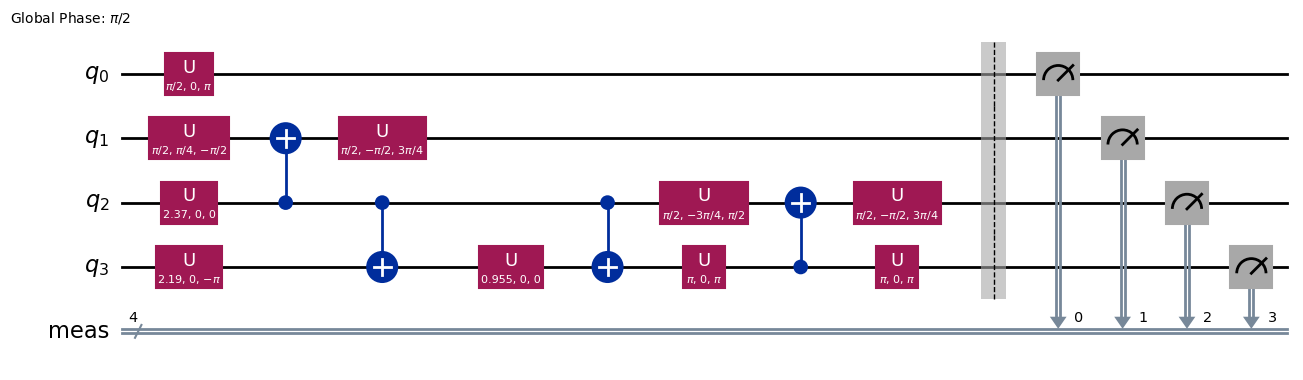

In [5]:
sim = Aer.get_backend('aer_simulator')

qc_t = transpile(circ, basis_gates=['u', 'cx'])

qc_t.draw('mpl')

###Etapa de simulação o circuito resultante

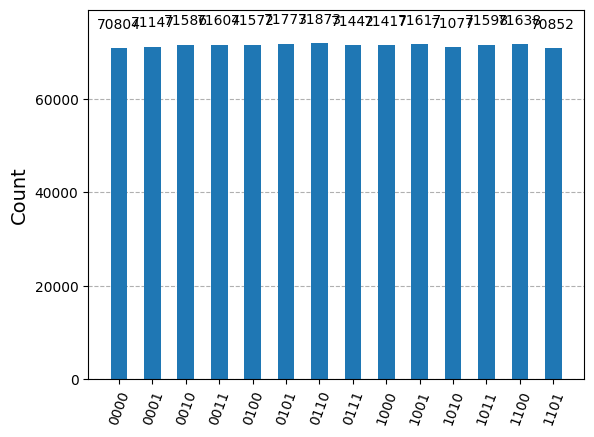

In [6]:
counts = sim.run(qc_t,shots = 1000000).result().get_counts()
plot_histogram(counts)